In [28]:
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


In [22]:
date_csv = pd.read_csv('Yingkou_Ningbo_deals.csv')
dataset = date_csv['deals'].values
dataset = dataset.astype('float32')
max_value = np.max(dataset)  # 获得最大值
min_value = np.min(dataset)
scalar = max_value - min_value  # 获得间隔数量
#scaler = MinMaxScaler(feature_range=(0, 1))
#dataset = scaler.fit_transform(dataset_deal)
dataset = list(map(lambda x: (x - min_value) / scalar, dataset))
n_steps = 3
X_all, y_all = split_sequence(dataset, n_steps)
n_features = 1
X_all = X_all.reshape((X_all.shape[0], X_all.shape[1], n_features))

In [31]:
train_size = 32
test_size = len(X_all) - train_size

X_train = X_all[:train_size]
y_train = y_all[:train_size]

X_test = X_all[train_size:]
y_test = y_all[train_size:]
X_test

array([[[0.08695652],
        [0.30706522],
        [0.        ]],

       [[0.30706522],
        [0.        ],
        [0.00271739]],

       [[0.        ],
        [0.00271739],
        [0.        ]]], dtype=float32)

In [20]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train,y_train,epochs=200,verbose=0)

In [32]:
x_input = X_test
x_input = x_input.reshape((3, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[0.19225943]
 [0.20630582]
 [0.2509361 ]]


In [35]:
pred_y = list(map(lambda x : x * scalar + min_value, yhat))
real_y = y_test

real_y = list(map(lambda x : x * scalar + min_value, real_y))
print(real_y)

[0.00271739 0.         0.00271739]


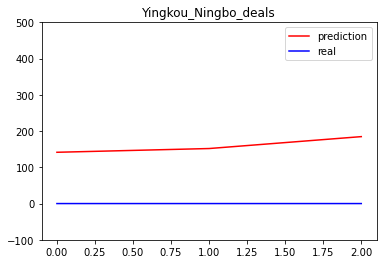

In [38]:
plt.title('Yingkou_Ningbo_deals')
plt.plot(pred_y, 'r', label='prediction')
plt.plot(real_y, 'b', label='real')
#ymajorLocator  = MultipleLocator(100)
#ax=plt.gca()
#ax.yaxis.set_major_locator(ymajorLocator)

plt.ylim(-100,500)
plt.legend(loc='best')
plt.savefig('Yingkou_Ningbo_deals_new1.png')